#**Kaggle Dataset Import and Google Collab**

In [2]:
#install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=cf3ce9a6b1e34d2a12bbaf6bf510ae92d5dfb6ec61fa668f2b2293c074366f45
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
#import api key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jacobyim","key":"11fb2dd9842345f8d53eabb9a24ab056"}'}

In [4]:
#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
#Change permissions of folder "kaggle"
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#import dataset
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 62.5MB/s]


In [7]:
#unzip file contents
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#**Library Imports**

In [8]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

#sets graph design
sns.set_style("white")


#ignore warnings
warnings.filterwarnings("ignore")

#allow matplotlib to allow graph in juptyer notebook
%matplotlib inline

#**DataFrame Variables**

In [9]:
#Pandas DataFrame Variables
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [10]:
#Print DataFrame Variables
print(df_test.head())
print(df_train.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


#**Combined Columns Investigation**

In [11]:
#list both df
frames = [df_test,df_train]
#concat frames
df = pd.concat(frames)

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- The purpose of concating the two datasets are soley used to investigate the column names and type.

#**Train Data Investigation**

In [13]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [14]:
#This is how we know the last column in df_train is unique
for x in range(len(df_test.columns)):
  if df_train.columns[x] == df_test.columns[x]:
    continue
  else:
    print(df_train.columns[x]) #print the column if there is a unique column

- Although there are 81 columns in the train dataframe, we check with the 80 columns from the test dataframe. With no resulting output, we know that the last column in the train dataframe is the unique column within the two datasets.

In [15]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#**Duplicates**

In [16]:
#show duplicates of df_train DataBase object
df_train[df_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


- We know that there are no duplicates returned from this database

In [17]:
#describe the sales price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#**Exploratory Data Analytics**

##Histogram/Rugplot

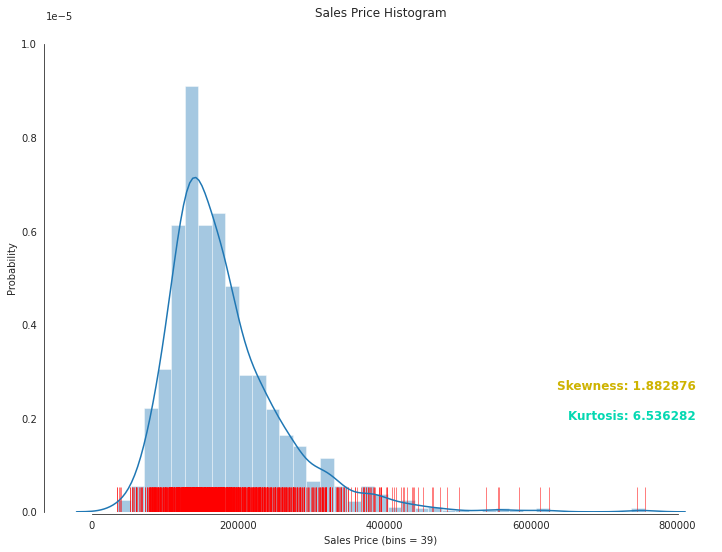

In [18]:
#Histogram
fig, ax = plt.subplots(figsize=(12, 9))
#Bins Calculated from the Square Root method
sns.distplot(df_train['SalePrice'], rug=True, rug_kws={'color':'r', 'height':0.05, 'lw':.5}, bins = 39)

#set labels
ax.set_title('Sales Price Histogram')
ax.set_xlabel('Sales Price (bins = 39)')
ax.set_ylabel('Probability')

#set legends
ax.text(x=0.97, y=0.27, transform=ax.transAxes, s="Skewness: %f" % df_train['SalePrice'].skew(),\
  fontweight='demibold', fontsize=12, verticalalignment='top', horizontalalignment='right',\
  color='xkcd:mustard')
ax.text(x=0.97, y=0.21, transform=ax.transAxes, s="Kurtosis: %f" % df_train['SalePrice'].kurt(),\
  fontweight='demibold', fontsize=12, verticalalignment='top', horizontalalignment='right',\
  color='xkcd:aquamarine')



sns.despine(offset=2, trim=True)

- From this histogram, we can see that this data is not normally distributed. Since we cannot technically have a negative sales value, we are looking at a graph that is positive skewed. One observation from this distribution plot is that we can confirm that there are no data with weird negative sales values. Another observation would be the outliers listed around the $800,000 range.

##Correlation Matrix

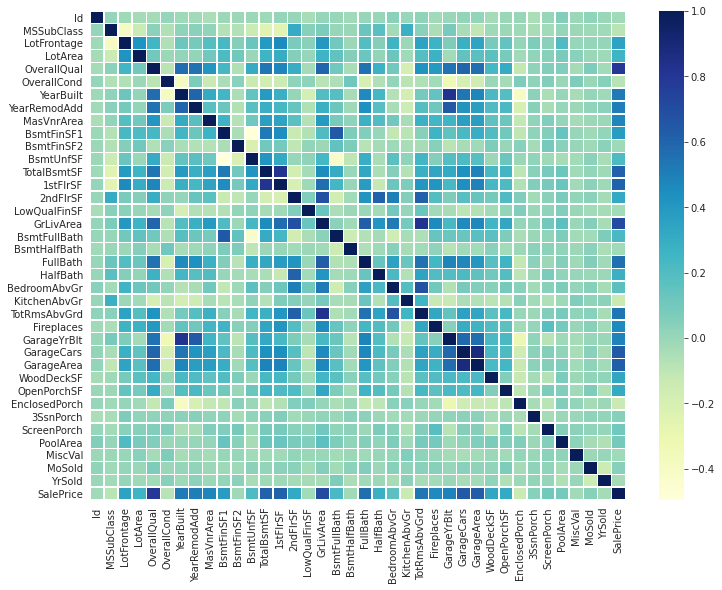

In [19]:
#correlation matrix
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, linewidths=.5, cmap='YlGnBu');

- Since we are observing the sales price, it is important to take note of the sales price within this correlation matrix. Relationships of Sales Price include "OverallQual, TotalBsmtSF, 1stFlrSF, GRLivArea, FullBath, GarageCars, and GarageArea."

##Zoomed Scatter Correlation Bubble

####Function

In [20]:
#Correlation bubble function parameters
def corrbubble(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_value = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.8, cmap="bwr",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 50 + 5
    ax.annotate(corr_value, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

#Scatter Function with Correlation Bubble Parameters
def scatter_corrbubble(df):
    sns.set(style='white', font_scale=1.6);
    g = sns.PairGrid(df, height=2, aspect=1.4, diag_sharey=False);
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'red'});
    g.map_diag(sns.distplot, kde_kws={'color': 'darkblue'});
    g.map_upper(corrbubble);



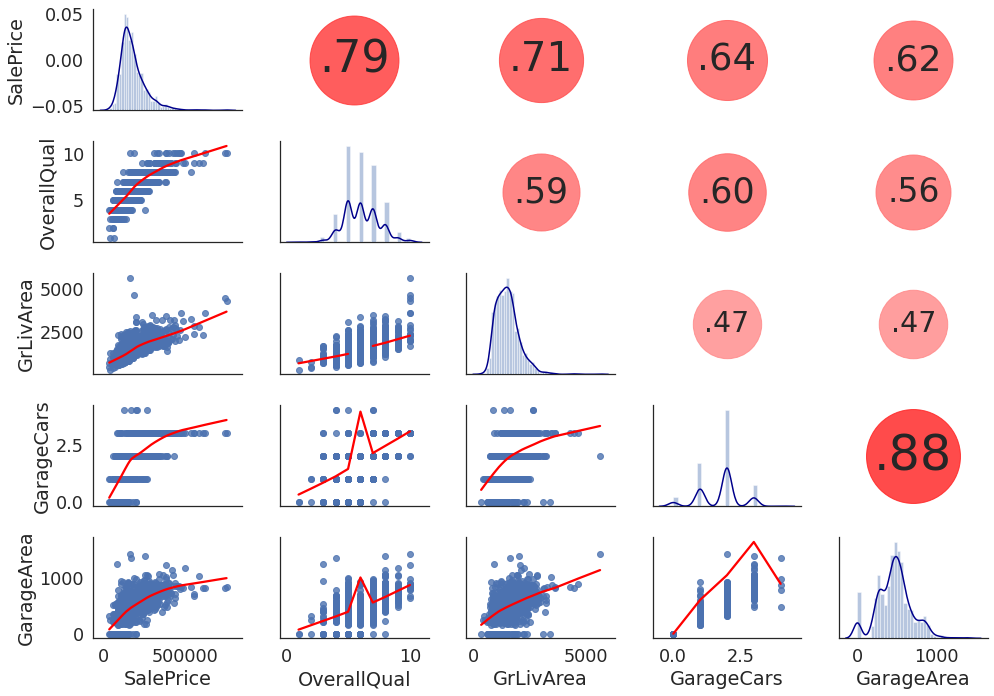

In [21]:
#top 5 highest of taken from correlation matrix for the row sales price
col = corr.nlargest(5, 'SalePrice')['SalePrice'].index
scatter_corrbubble(df_train[col])

- From the sales price, we can confirm that there is correlation with the overall quality of the material of the house. Granted with the higher quality, price would range with the material cost. Another observation to note would be the Garage Car (capacity calulated by number of cars) and Garage Area. It makes sense that a garage that can hold more cars would require a larger area. With that in mind, our correlation bubble shows that these variables are also positively correlated with the sales price. It seems that the larger the space and capacity, the more the sales price would increase.

##Boxplot

Text(0.5, 0, 'Overall Quality of Material')

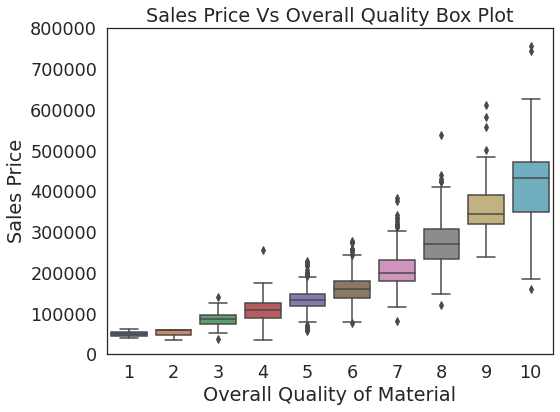

In [37]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
ax.set_ylim(0,800000)
ax.set_title("Sales Price Vs Overall Quality Box Plot")
ax.set_ylabel("Sales Price")
ax.set_xlabel("Overall Quality of Material")

- OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

- From this boxplot, the mean from each quality shows that there is a clear rising distinction in sales price. We can confirm that the higher the quality the greater the sales price. We can also make point of the outliers listed in each quality.
	

##Violin Plot

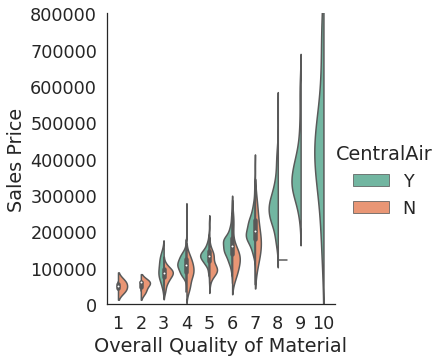

In [36]:
#multimodal Distribution
hue = 'CentralAir'
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var],df_train[hue]], axis=1)
fig = sns.catplot(x=var, y="SalePrice",kind='violin',palette="Set2" , hue=hue, data=data ,split=True)
plt.ylim(0,800000)
plt.ylabel("Sales Price")
plt.xlabel("Overall Quality of Material")
plt.show()

- I wanted to see the importance of central air with comparison to the overall quality and sales price. It appears that the lower quality homes only have no central air, while the higher quality homes only have central air.